In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy import stats
import re
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [1]:
import xgboost as xgb
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential

In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
import pandas as pd
data = pd.read_csv('SolarPrediction.csv')

In [5]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [11]:
df = data.copy()

In [20]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


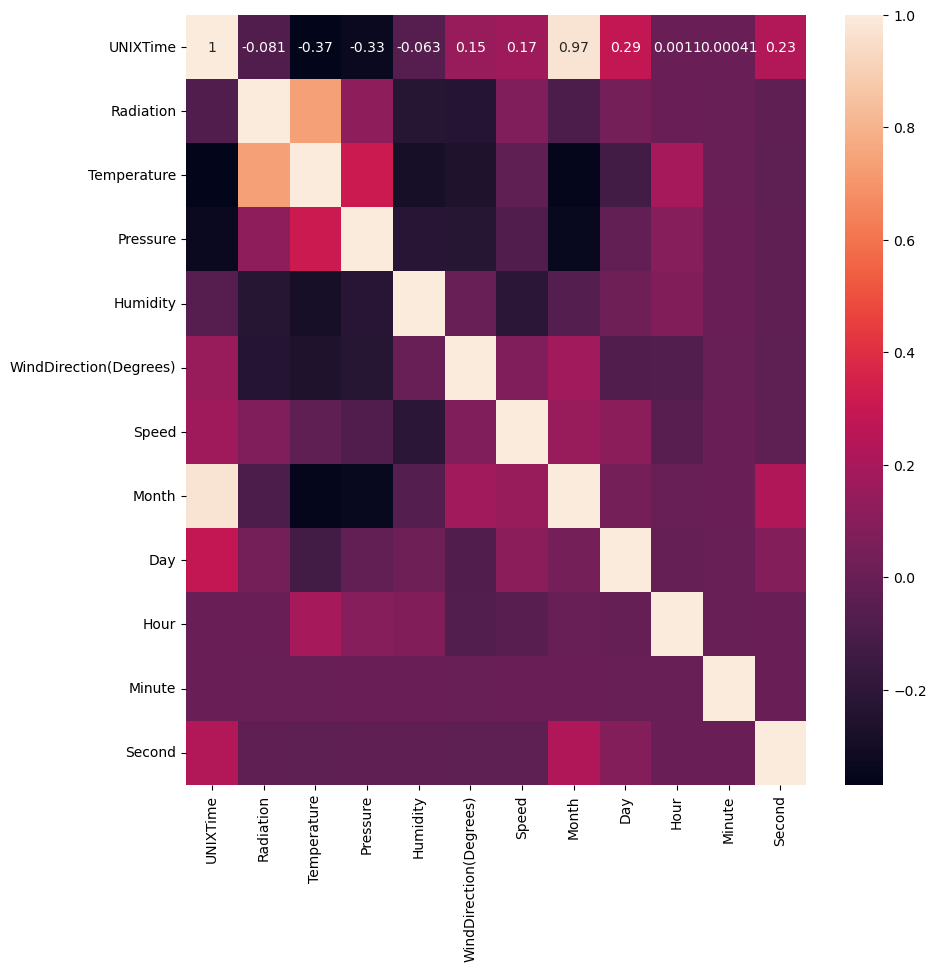

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2, k=10)

In [32]:
from sklearn import preprocessing
target = ['High', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'High']
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(target)

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
numeric_df = df.select_dtypes(include=['number'])
scaled_numeric_df = MinMaxScaler().fit_transform(numeric_df)
target_cont = df['Radiation'].apply(lambda x : int(x*100))
features = df.select_dtypes(include=['number']).drop('Radiation', axis=1)
scaled_input_features = MinMaxScaler().fit_transform(features)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(scaled_input_features, target_cont)

In [43]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(features.columns)

In [44]:
featureScores = pd.concat([column, scores], axis=1)
featureScores.columns = ['Features', 'feature_imp']

In [45]:
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
featureScores

,Features,feature_imp
6,Month,4684.579610
4,WindDirection(Degrees),3271.827277
0,UNIXTime,3026.266167
7,Day,2841.926850
9,Minute,2702.449333
10,Second,2288.673032
1,Temperature,1651.685632
3,Humidity,1588.087433
5,Speed,765.859779
8,Hour,691.185393


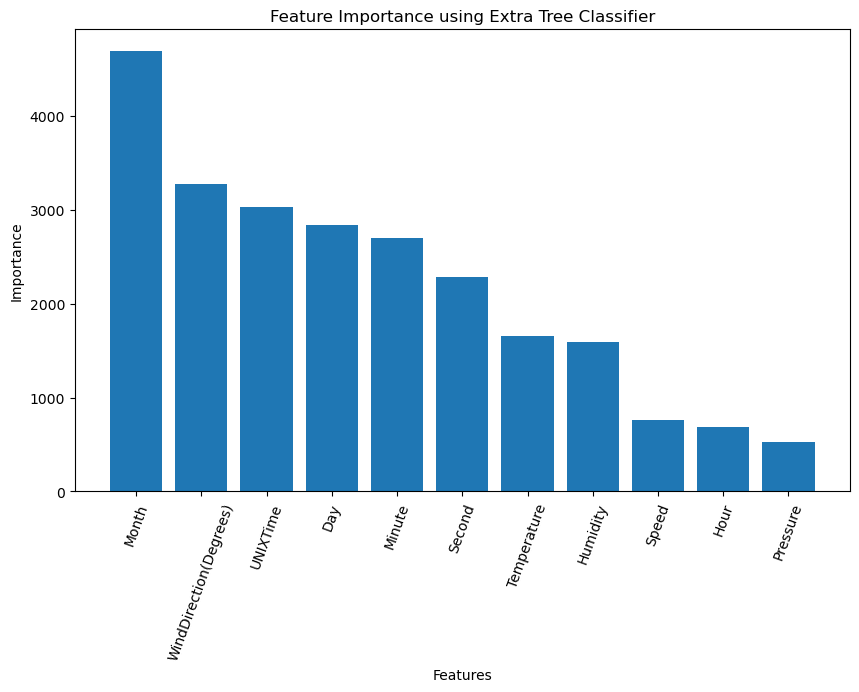

In [53]:
plt.figure(figsize = (10, 6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Classifier")
plt.show()

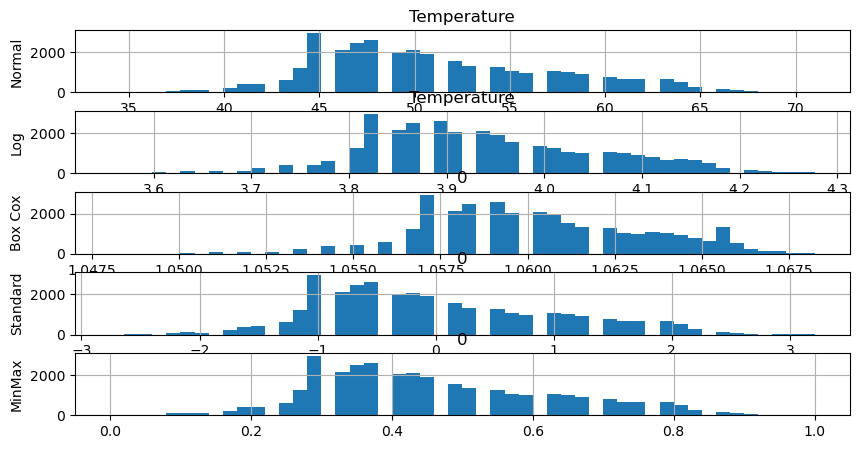

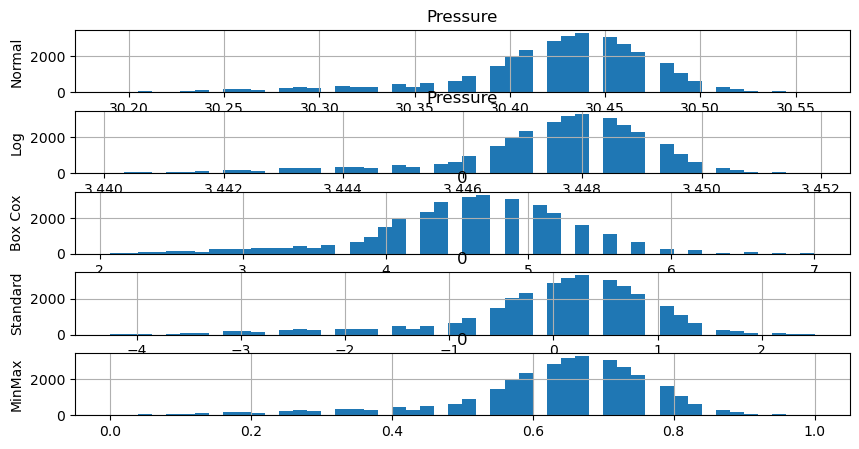

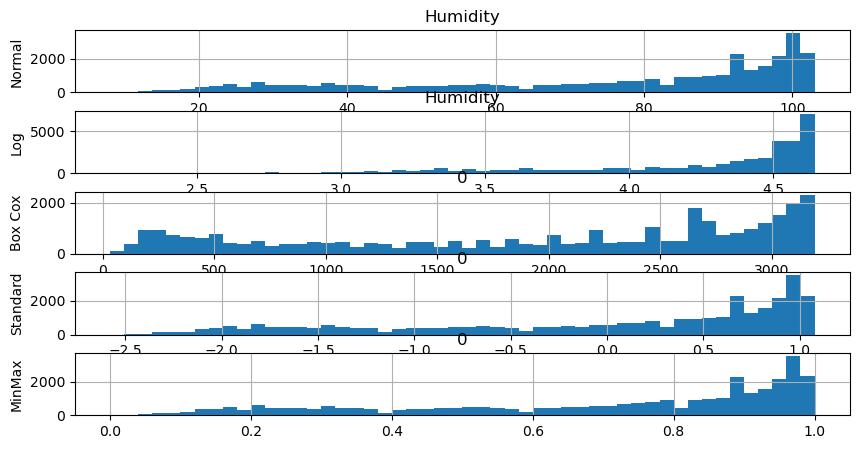

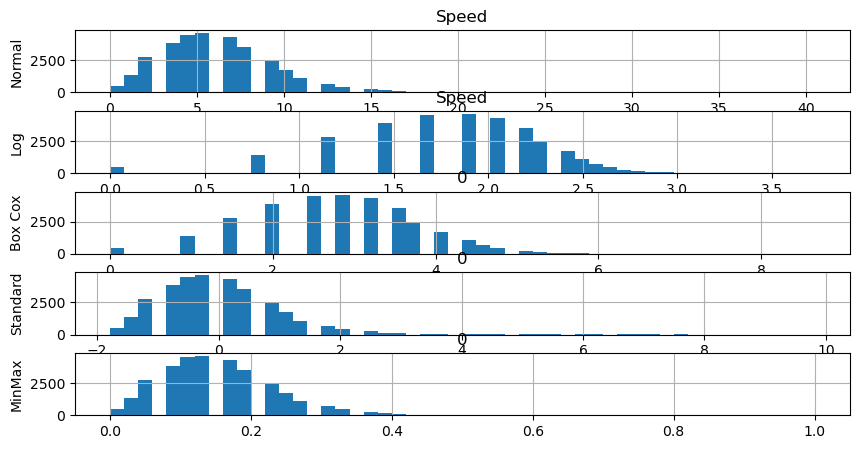

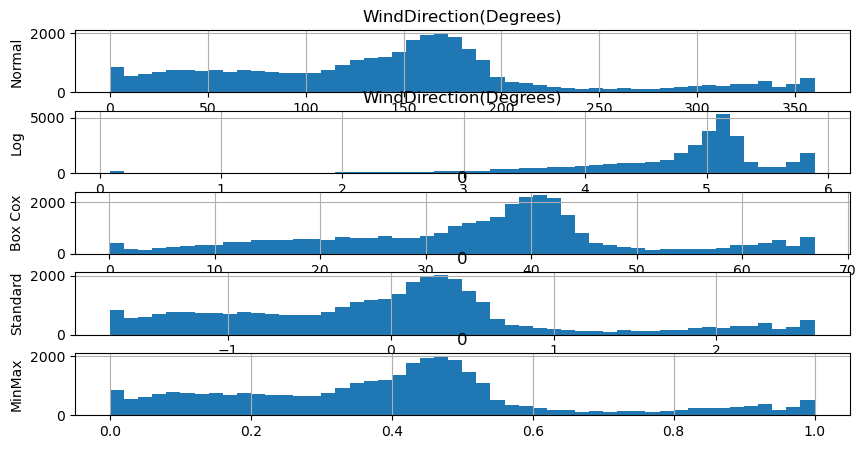

In [60]:
import numpy as np
np.seterr(over='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

featuresToTransform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in featuresToTransform:
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))

    pd.DataFrame(features[i]).hist(ax=ax1, bins=50)
    pd.DataFrame((features[i] + 1).transform(np.log)).hist(ax=ax2, bins=50)
    pd.DataFrame(stats.boxcox(features[i] + 1)[0]).hist(ax=ax3, bins=50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(features[i]).reshape(-1, 1))).hist(ax=ax4, bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(features[i]).reshape(-1, 1))).hist(ax=ax5, bins=50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')
    
    plt.show()

In [61]:
transform = {'Temperature' : (features['Temperature']+1).transform(np.log),

'Pressure': stats.boxcox(features['Pressure']+1)[0],
'Humidity' : stats.boxcox(features['Humidity']+1)[0],
'Speed' : (features['Speed']+1).transform(np.log),
'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
np.array(features['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    features[i] = transform[i]

In [62]:
features.head()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second
0,1475229326,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26
1,1475229023,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23
2,1475228726,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26
3,1475228421,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21
4,1475228124,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24


In [65]:
features = features[:len(target)]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
from xgboost import XGBRegressor
params = {
    'learning_rate': 0.1,
    'max_depth':8
}
model = XGBRegressor(**params)

In [22]:
import pandas as pd
import numpy as np
data = pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1)
header_row_index = data[data.iloc[:, 0] == "UNIXTime"].index
if len(header_row_index) > 0:
    header_row_index = header_row_index[0]
    data = data.iloc[header_row_index + 1:]
data_np = data.apply(pd.to_numeric, errors='coerce').to_numpy()
x_train_np = data_np[:, :-1]
y_train_np = data_np[:, -1]
print("x_train_np shape:", x_train_np.shape)
print("y_train_np shape:", y_train_np.shape)
print("Any missing values in x_train_np:", np.isnan(x_train_np).any())
print("Any missing values in y_train_np:", np.isnan(y_train_np).any())


x_train_np shape: (2927636, 1)
y_train_np shape: (2927636,)
Any missing values in x_train_np: True
Any missing values in y_train_np: False


In [17]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
data = pd.read_csv("SolarPrediction.csv")
data = data.drop(columns=['Time', 'TimeSunRise', 'TimeSunSet', 'Data'])
X = data.drop(columns=['Radiation'])
y = data['Radiation']
x_train_np = X.to_numpy()
y_train_np = y.to_numpy()
x_train_np = x_train_np.astype(float)
y_train_np = y_train_np.astype(float)
x_train, x_test, y_train, y_test = train_test_split(x_train_np, y_train_np, test_size=0.2, random_state=42)
params = {
    'objective': 'reg:squarederror',  
    'max_depth': 6,                   
    'learning_rate': 0.1,             
    'random_state': 42                
}
model = XGBRegressor(**params)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
r2s = r2_score(y_pred,y_test)

In [22]:
print("Model Performance: ")
print(f'RMSE : {rmse}\nr2s : {r2s}')

Model Performance: 
RMSE : 115.8742983910539
r2s : 0.8311898069598518


In [24]:
from sklearn.metrics import r2_score
percentage_explained_variance = r2s * 100
print("Model Performance: ")
print(f'RMSE : {rmse}\nExplained Variance (R^2) : {percentage_explained_variance:.2f}%')

Model Performance: 
RMSE : 115.8742983910539
Explained Variance (R^2) : 83.12%


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=14))
model.add(Dropout(0.33))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1,activation='relu'))
model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))

In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27410.5430 - mean_absolute_error: 101.0914 - val_loss: 28628.5918 - val_mean_absolute_error: 102.6009
Epoch 2/50
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26470.0020 - mean_absolute_error: 98.7489 - val_loss: 28744.7930 - val_mean_absolute_error: 102.3416
Epoch 3/50
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26108.1562 - mean_absolute_error: 97.5502 - val_loss: 28561.1250 - val_mean_absolute_error: 102.9781
Epoch 4/50
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26484.3711 - mean_absolute_error: 99.7905 - val_loss: 28526.3379 - val_mean_absolute_error: 103.9704
Epoch 5/50
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26916.2188 - mean_absolute_error: 100.1950 - val_loss: 28861.5039 - val_mean_absolute_error: 104.8643
Epoch 6/50
662/662 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26726.5254 - mean_absolute_error: 99.9938 - val_loss: 28528.9062 - val_mean_absolute_error: 104.5123
Epoch 7/50
662/662 ━━━━━━━━━━━━━

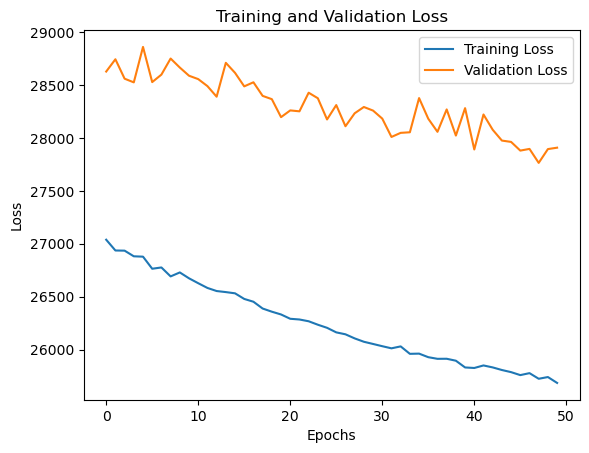

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
x_train_numeric = x_train.select_dtypes(include=[np.number])
x_train_numeric = x_train_numeric.loc[y_train.index]
x_train_numeric, x_val, y_train, y_val = train_test_split(x_train_numeric, y_train, test_size=0.1, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_numeric)
x_val_scaled = scaler.transform(x_val)
history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.7451 - mse: 0.7467 - val_loss: 0.7410 - val_mse: 0.7410
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5370 - mse: 0.5351 - val_loss: 0.5733 - val_mse: 0.5733
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4655 - mse: 0.4710 - val_loss: 0.4337 - val_mse: 0.4337
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3373 - mse: 0.3390 - val_loss: 0.3240 - val_mse: 0.3240
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2169 - mse: 0.2183 - val_loss: 0.2430 - val_mse: 0.2430
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1650 - mse: 0.1667 - val_loss: 0.1873 - val_mse: 0.1873
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1270 - mse: 0.1280 - val_loss: 0.1533 - val_mse: 0.1533
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1021 - mse: 0.1020 - val_loss: 0.1362 - val_mse: 0.1362
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1075 - mse: 0.1085 -

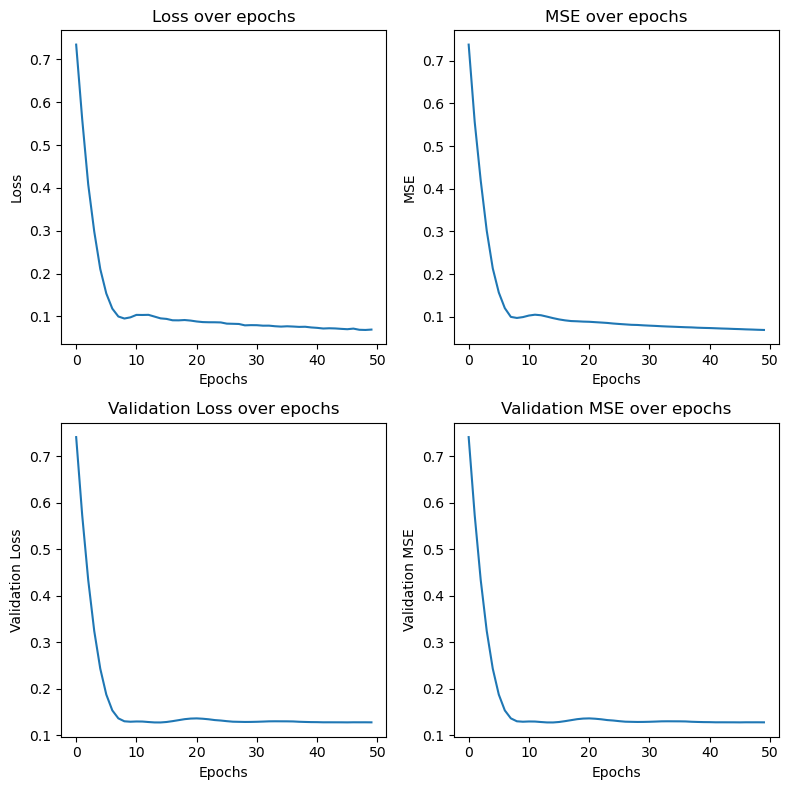

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
x_train = np.random.rand(100, 10)  
y_train = np.random.rand(100)  
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))  
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

if 'loss' in history.history:
    axs[0, 0].plot(history.history['loss']) 
    axs[0, 0].set_title('Loss over epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].set_xlabel('Epochs')

if 'mse' in history.history:
    axs[0, 1].plot(history.history['mse'])
    axs[0, 1].set_title('MSE over epochs')
    axs[0, 1].set_ylabel('MSE')
    axs[0, 1].set_xlabel('Epochs')

if 'val_loss' in history.history:
    axs[1, 0].plot(history.history['val_loss'])
    axs[1, 0].set_title('Validation Loss over epochs')
    axs[1, 0].set_ylabel('Validation Loss')
    axs[1, 0].set_xlabel('Epochs')

if 'val_mse' in history.history:
    axs[1, 1].plot(history.history['val_mse'])
    axs[1, 1].set_title('Validation MSE over epochs')
    axs[1, 1].set_ylabel('Validation MSE')
    axs[1, 1].set_xlabel('Epochs')
    
plt.tight_layout()
plt.show()
